<a href="https://colab.research.google.com/github/longovinicius/PDS/blob/main/AnalogFilters_DSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalando Dependências

In [ ]:
!pip install control


# Funções Gerais

In [ ]:
import math
import numpy as np 
import control.matlab
import matplotlib.pylab as plt

def encontrar_fator_ajuste_ganho(a):
  return math.sqrt(10**(-0.1*a) - 1)

def encontrar_ordem(astop, apass, wstop, wpass):
  num = math.log10((encontrar_fator_ajuste_ganho(astop)**2/encontrar_fator_ajuste_ganho(apass)**2))
  den = 2*math.log10(wstop/wpass)
  result = num/den
  print("n =",round(result, 3), ", ordem", math.ceil(result))
  return math.ceil(result)

def encontrando_angulo_polos(n):
  if(n%2==0):
    m = np.arange(0, n/2)
    return math.pi*(2*m + n + 1)/(2*n)
  else:
    m = np.arange(0, (n-1)/2)
    return math.pi*(2*m + n + 1)/(2*n)

def encontrar_FT_butterworth_npar(sigma_m, omega_m, n):
  B1m = -2*sigma_m 
  B2m = sigma_m**2 + omega_m**2

  s = control.matlab.tf('s')
  print("B1m:", B1m, "B2m:", B2m)
  if (n%2==0):
    coef = np.array([1])
    for i in range(len(sigma_m)):
      a   = np.array([1, B1m[i], B2m[i]])
      coef = np.polymul(coef,a)
    return lambda S: np.prod(B2m)/sum([S**i *coef[i] for i in range(len(coef))])
  else:
    print("lida apenas com n par")
    pass

def encontrar_FT_PA_ampOp(FT,RA,C):
  polos = control.matlab.pole(FT)
  n = len(polos)
  ganho = FT.num[0][0][0]**(1/n)
  R, RB, K = [],[],[]

  if (n%2==0):
    
    for i in range(int(n/2)):
      aux1 = np.array([1,-polos[i]])
      aux2 = np.array([1, -polos[i+1]])
      den = np.polymul(aux1, aux2).real
      print("H",i," = ", control.matlab.tf([ganho, 0, 0], den))
      
      RBA = 2 - (den[1]/math.sqrt(den[2]))
      K.append(1+RBA)
      RB.append(RA*RBA)
      R.append(1/math.sqrt(den[2]*C**2))
    return R, RB, K, ganho
  else:
    print("lida apenas com n par")
    pass

def encontrar_FT_BP_ampOp(FT,RA,C):
  polos = control.matlab.pole(FT)
  n = len(polos)
  ganho = FT.num[0][0][0]**(1/n)
  R, RB, K = [],[], []

  if (n%2==0):
    
    for i in range(int(n/2)):
      aux1 = np.array([1,-polos[i]])
      aux2 = np.array([1, -polos[i+1]])
      den = np.polymul(aux1, aux2).real
      print("H",i," = ", control.matlab.tf([ganho, 0, 0], den))
      
      RBA = 3 - math.sqrt(2*den[1]**2/den[2])
      K.append(1+RBA)
      RB.append(RA*RBA)
      R.append(math.sqrt(2/(den[2]*C**2)))
    return R, RB, K, ganho
  else:
    print("lida apenas com n par")
    pass

# Questão 1

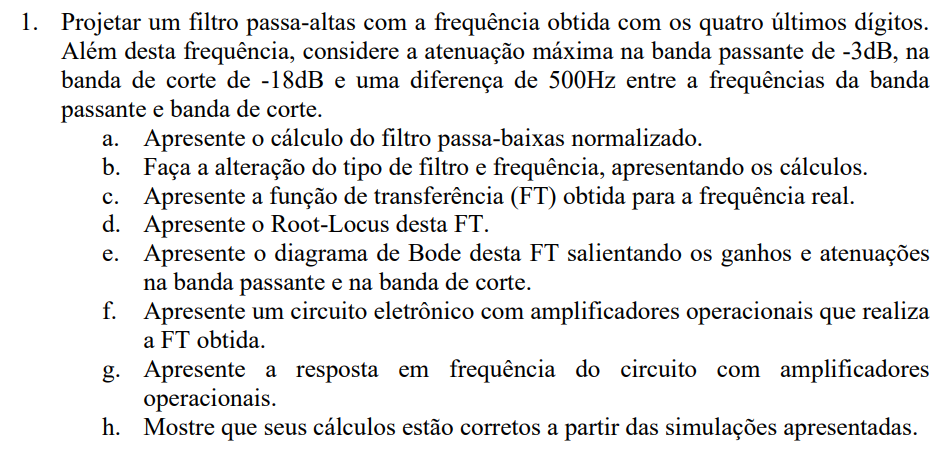

## a) Apresente o cálculo do filtro passa-baixas normalizado.

### Dados iniciais

In [ ]:
apass = -3  #[dB]
astop = -18 #[dB]
fpass = 544
fstop = 1044
w_normalizado = fpass/fstop
wpass = fpass*2*math.pi
wstop = fstop*2*math.pi

In [ ]:
print(wpass, wstop)

3418.052807105695 6559.645460695488


### Constantes Fundamentais

In [ ]:
# Ripple (fator de ajuste no apass)
ripple = encontrar_fator_ajuste_ganho(apass)

# Encontrando Ordem
n = encontrar_ordem(astop, apass, wstop, wpass)
# Dados
# raio R:
R = encontrar_fator_ajuste_ganho(apass)**(-1/n)

print("ripple =", round(ripple, 3))
print("Raio =", round(R, 3))

n = 3.17 , ordem 4
ripple = 0.998
Raio = 1.001


### Encontrando posições dos Polos

In [ ]:
# Encontrando angulos para polos complexos
teta_m = encontrando_angulo_polos(n)

# Encontrando posicoes dos polos:
sigma_m = R*np.cos(teta_m)
omega_m = R*np.sin(teta_m)

print("teta_m =", teta_m)
print("sigma_m =", sigma_m)
print("omega_m =", omega_m)

teta_m = [1.96349541 2.74889357]
sigma_m = [-0.38291067 -0.92442813]
omega_m = [0.92442813 0.38291067]


### Encontrando a Ordem

In [ ]:
# Coeficientes para funcao de transferência
H = encontrar_FT_butterworth_npar(sigma_m, omega_m, n)
s = control.matlab.tf('s')# Ripple (fator de ajuste no apass)
ripple = encontrar_fator_ajuste_ganho(apass)

# Encontrando Ordem
n = encontrar_ordem(astop, apass, wstop, wpass)
# Dados
# raio R:
R = encontrar_fator_ajuste_ganho(apass)**(-1/n)

print("ripple =", round(ripple, 3))
print("Raio =", round(R, 3))
H(s)

B1m: [0.76582134 1.84885625] B2m: [1.00118794 1.00118794]
n = 3.17 , ordem 4
ripple = 0.998
Raio = 1.001


TransferFunction(array([1.00237729]), array([1.00237729, 2.61778367, 3.41826945, 2.61467759, 1.        ]))

## b/c) Faça a alteração do tipo de filtro e frequência, apresentando os cálculos e Apresente a função de transferência (FT) obtida para a frequência real

In [ ]:
# passando para passa-altas
fpass = 1044
fstop = 544
wpass = fpass*2*math.pi
wstop = fstop*2*math.pi
w_zero = 2*math.pi*fpass 
HPA = H(w_zero/s)
HPA = control.matlab.minreal(HPA)
HPA


6 states have been removed from the model


TransferFunction(array([1.00237729, 0.        , 0.        , 0.        , 0.        ]), array([1.00000000e+00, 1.71513580e+04, 1.47084540e+08, 7.38881606e+11,
       1.85589195e+15]))

## d) Apresente o Root-Locus desta FT

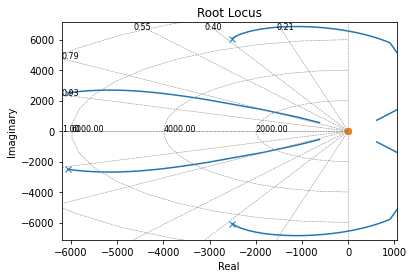

In [ ]:
# lugar das raízes
control.matlab.rlocus(HPA)
plt.show()

## e) Apresente o diagrama de Bode desta FT salientando os ganhos e atenuações na banda passante e na banda de corte.

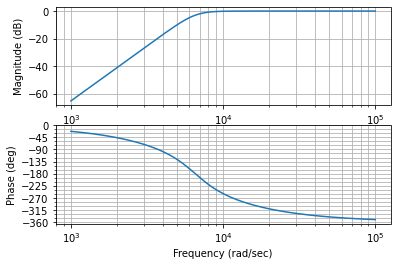

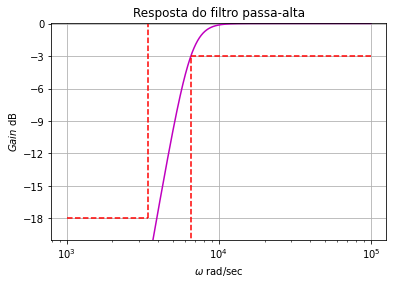

In [ ]:
# diagrama de bode
ganho, theta, w = control.matlab.bode(HPA, plot = True)
plt.show()

ganho_em_dB = 20*np.log10(ganho)
ypass, ystop = np.interp([wpass, wstop], w, ganho_em_dB)
plt.semilogx(w, ganho_em_dB, 'm')
plt.plot([wpass, wpass],[-40, apass], 'r--', [w[-1],wpass], [apass,apass],'r--')
plt.plot([wstop, wstop],[astop, 0], 'r--', [w[0], wstop], [astop,astop],'r--')
plt.ylim([-20,0.1])
plt.yticks(np.arange(0,-21,-3))
plt.grid()
plt.xlabel(r'$\omega$ rad/sec')
plt.ylabel(r'$Gain$ dB')
plt.title('Resposta do filtro passa-alta')
plt.show()

## Circuito com amplificadores operacionais


In [ ]:
# Resistores do circuito
R, RB, K, ganho = encontrar_FT_PA_ampOp(HPA,100e3, 10e-9)
print('R =', np.round(np.array(R)/1e3 ,3), 'kOhm')
print('RB =',np.round(np.array(RB)/1e3,3) , 'kOhm')
print('K =', np.round(np.array(K),3))


# Calculando o ajuste de ganho
GA = np.prod(K)/HPA.num[0][0][0]
RX = GA*100e3
RY = GA*100e3/(GA - 1)
print('GA = ',round(GA,3))
print('RX = ',round(RX/1e3,3),'kOhm')
print('RY = ',round(RY/1e3,3),'kOhm')



H 0  =  
       1.001 s^2
------------------------
s^2 + 5024 s + 4.308e+07

H 1  =  
       1.001 s^2
------------------------
s^2 + 8576 s + 3.046e+07

R = [15.236 18.118] kOhm
RB = [123.463  44.623] kOhm
K = [2.235 1.446]
GA =  3.224
RX =  322.412 kOhm
RY =  144.962 kOhm


# Questão 2 - Passa-Banda

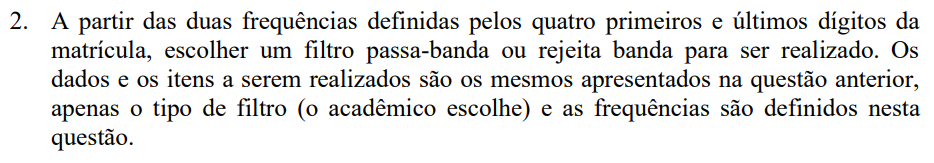

## a) Apresente o cálculo do filtro passa-baixas normalizado.

### Dados iniciais

matrícula: 2125 0044

Como os quatro últimos dígitos são menores que os quatro primeiros, foi somado 1000 nos quatro últimos e utilizado essa frequência como $f_{pass1}$

In [ ]:
apass   = -3  #[dB]
astop   = -18 #[dB]
fpass1  = 1044
fpass2  = 2125
fstop1  = fpass1 - 500
fstop2  = fpass2 + 500

print('fstop1 = ',fstop1)
print('fstop2 = ',fstop2)

fstop1 =  544
fstop2 =  2625


### Verificando viabilidade do filtro

In [ ]:
# verificando se o filtro é possível
print('fpass1/fstop1 = ', fpass1/fstop1)
print('fpass2/fstop2 = ', fpass2/fstop2)

# caso em que as razões são diferentes
if fpass1/fstop1 != fpass2/fstop2:
  fstop1 = fpass1*fpass2/fstop2
  print('fstop1novo =', fstop1)

fpass1/fstop1 =  1.9191176470588236
fpass2/fstop2 =  0.8095238095238095
fstop1novo = 845.1428571428571


### Constantes Fundamentais

In [ ]:
# Ripple (fator de ajuste no apass)
ripple = encontrar_fator_ajuste_ganho(apass)

# raio R:
R = encontrar_fator_ajuste_ganho(apass)**(-1/n)

print("ripple =", round(ripple, 3))
print("Raio =", round(R, 3))

ripple = 0.998
Raio = 1.001


### Encontrando a ordem

In [ ]:
# Encontrando Ordem
wstop = 2*math.pi*(fstop2 - fstop1)
wpass = 2*math.pi*(fpass2 - fpass1)
n = encontrar_ordem(astop, apass, wstop, wpass)
if n > 4:
  n = 4

n = 4.145 , ordem 5


In [ ]:
wstop/wpass

1.6464913439936566

### Ajustando atenuação

In [ ]:
# Encontrando novo valor de atenuação
astop = -10*np.log10((wstop/wpass)**(2*n)*(10**(-0.1*apass) - 1) + 1)
print('astopnovo = ',astop)

astopnovo =  -17.384181960103845


### Encontrando a posição dos polos

In [ ]:
# Encontrando angulos para polos complexos
teta_m = encontrando_angulo_polos(n)

# Encontrando posicoes dos polos:
sigma_m = R*np.cos(teta_m)
omega_m = R*np.sin(teta_m)

print("teta_m =", teta_m)
print("sigma_m =", sigma_m)
print("omega_m =", omega_m)

teta_m = [1.96349541 2.74889357]
sigma_m = [-0.38291067 -0.92442813]
omega_m = [0.92442813 0.38291067]


Função de transferência passa-baixa normalizado

In [ ]:
# funcao de transferência normalizada
s = control.matlab.tf('s')
H = encontrar_FT_butterworth_npar(sigma_m, omega_m, n)
H(s)

B1m: [0.76582134 1.84885625] B2m: [1.00118794 1.00118794]


TransferFunction(array([1.00237729]), array([1.00237729, 2.61778367, 3.41826945, 2.61467759, 1.        ]))

## b/c) Faça a alteração do tipo de filtro e frequência, apresentando os cálculos e Apresente a função de transferência (FT) obtida para a frequência real

In [ ]:
# passando para o passa-banda
w_zero_pb = 2*math.pi*math.sqrt(fpass1*fpass2)
bw = 2*math.pi*(fpass2 -fpass1)
HPB = control.matlab.minreal(H((s**2 + w_zero_pb**2)/(bw*s)))
HPB

6 states have been removed from the model


TransferFunction(array([2.12824808e+15, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00]), array([1.00000000e+00, 1.77381408e+04, 5.07652297e+08, 5.47801341e+12,
       7.57049722e+16, 4.79780134e+20, 3.89407843e+24, 1.19169634e+28,
       5.88405440e+31]))

In [ ]:
print('w_zero =', w_zero_pb)
print('bandwidth = ',bw)

w_zero = 9358.571977351405
bandwidth =  6792.123317061133


## d) Apresente o Root-Locus desta FT

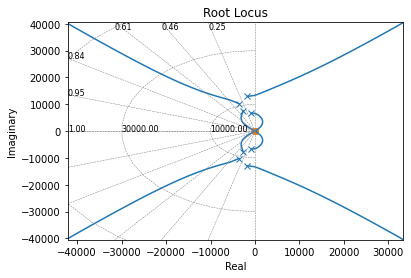

In [ ]:
# lugar das raízes
control.matlab.rlocus(HPB)
plt.show()

## e) Apresente o diagrama de Bode desta FT salientando os ganhos e atenuações na banda passante e na banda de corte.

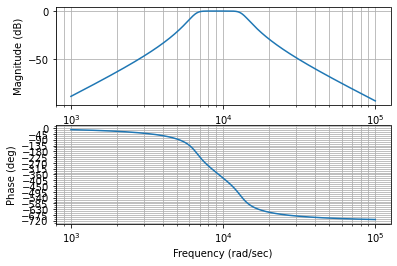

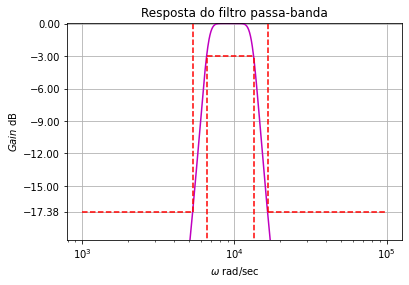

In [ ]:
# diagrama de bode
ganho, theta, w = control.matlab.bode(HPB, plot = True)
plt.show()

ganho_em_dB = 20*np.log10(ganho)
ticks = np.arange(0,-21,-3, dtype = float)
ticks[-1] = round(astop,2)

freqs = 2*math.pi*np.array([fpass1, fpass2, fstop1, fstop2])
ypass1, ypass2, ystop1, ystop2 = np.interp(freqs, w, ganho_em_dB)
plt.semilogx(w, ganho_em_dB, 'm')
plt.plot([freqs[0], freqs[0]], [-40,  apass], 'r--',
         [freqs[0], freqs[1]], [apass,apass], 'r--',
         [freqs[1], freqs[1]], [-40,  apass], 'r--')
plt.plot([freqs[2], freqs[2]], [astop, 0],    'r--', 
         [w[0], freqs[2]],     [astop, astop],'r--',
         [freqs[3], freqs[3]], [astop, 0],    'r--',
         [freqs[3], w[-1]],    [astop, astop],'r--')
plt.ylim([-20,0.1])
plt.yticks(ticks)
plt.grid()
plt.xlabel(r'$\omega$ rad/sec')
plt.ylabel(r'$Gain$ dB')
plt.title('Resposta do filtro passa-banda')
plt.show()

#### Circuito com amplificadores operacionais

In [ ]:
# Resistores do circuito
R, RB, K, ganho = encontrar_FT_BP_ampOp(HPB,100e3, 10e-9)
print('R =', np.round(np.array(R)/1e3 ,3), 'kOhm')
print('RB =',np.round(np.array(RB)/1e3,3) , 'kOhm')
print('K =', np.round(np.array(K),3))


# Calculando o ajuste de ganho
GA = np.prod(K)/(HPB.num[0][0][0]*np.prod(np.array(R))*(10e-9)**(len(R)))
RX = GA*100e3
RY = GA*100e3/(GA - 1)
print('GA = ',round(GA,3))
print('RX = ',round(RX/1e3,3),'kOhm')
print('RY = ',round(RY/1e3,3),'kOhm')

H 0  =  
       82.41 s^2
------------------------
s^2 + 3429 s + 1.701e+08

H 1  =  
       82.41 s^2
------------------------
s^2 + 5307 s + 1.383e+08

H 2  =  
       82.41 s^2
------------------------
s^2 + 7184 s + 1.174e+08

H 3  =  
       82.41 s^2
------------------------
s^2 + 6271 s + 8.758e+07

R = [10.844 12.024 13.051 15.111] kOhm
RB = [262.812 236.191 206.24  205.231] kOhm
K = [3.628 3.362 3.062 3.052]
GA =  208.33
RX =  20833.015 kOhm
RY =  100.482 kOhm
